In [28]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [29]:
#0) prepapre data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler() #to zero mean 1 standard deviation

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0],1)
Y_test = Y_test.view(Y_test.shape[0],1)



In [30]:
X_test.shape

torch.Size([114, 30])

#### Standard Scalaer

(array([  5.,  24.,  67., 223., 302., 313., 204.,  73.,  18.,   5.]),
 array([-3.41188587, -2.72676531, -2.04164474, -1.35652417, -0.67140361,
         0.01371696,  0.69883753,  1.38395809,  2.06907866,  2.75419923,
         3.43931979]),
 <BarContainer object of 10 artists>)

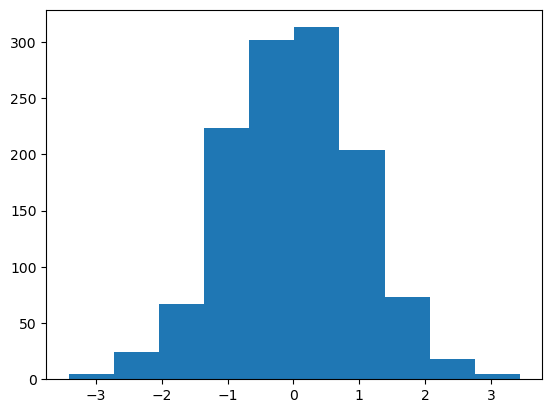

In [31]:
dat = np.random.normal(5,4,size=1234)
sc = StandardScaler()
dat = dat.reshape(1234,-1)
dat = sc.fit_transform(dat)
plt.hist(dat)

### Model


In [32]:
#1)model
#f = wx + b, sigmoid at the end]
class LogistRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogistRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
model = LogistRegression(n_features)
#2)loss and optimization
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

#3)training loop
num_epoch = 100000
for epoch in range(num_epoch):
    #forward pass and loss
    y_pred = model(X_train)
    l = loss(y_pred, Y_train)
    #backward pass
    l.backward()
    #update
    optimizer.step()
    #zero gradient
    optimizer.zero_grad()

    print("epoch:{}, loss = {:.4f}".format(epoch+1, l.item()))

with torch.no_grad():
    y_pred = model(X_train)


epoch:1, loss = 0.7596
epoch:2, loss = 0.7351
epoch:3, loss = 0.7121
epoch:4, loss = 0.6904
epoch:5, loss = 0.6701
epoch:6, loss = 0.6509
epoch:7, loss = 0.6330
epoch:8, loss = 0.6160
epoch:9, loss = 0.6001
epoch:10, loss = 0.5851
epoch:11, loss = 0.5709
epoch:12, loss = 0.5575
epoch:13, loss = 0.5449
epoch:14, loss = 0.5330
epoch:15, loss = 0.5216
epoch:16, loss = 0.5109
epoch:17, loss = 0.5007
epoch:18, loss = 0.4910
epoch:19, loss = 0.4818
epoch:20, loss = 0.4730
epoch:21, loss = 0.4647
epoch:22, loss = 0.4567
epoch:23, loss = 0.4490
epoch:24, loss = 0.4417
epoch:25, loss = 0.4347
epoch:26, loss = 0.4280
epoch:27, loss = 0.4216
epoch:28, loss = 0.4154
epoch:29, loss = 0.4095
epoch:30, loss = 0.4038
epoch:31, loss = 0.3983
epoch:32, loss = 0.3930
epoch:33, loss = 0.3879
epoch:34, loss = 0.3830
epoch:35, loss = 0.3783
epoch:36, loss = 0.3737
epoch:37, loss = 0.3693
epoch:38, loss = 0.3650
epoch:39, loss = 0.3608
epoch:40, loss = 0.3568
epoch:41, loss = 0.3529
epoch:42, loss = 0.3492
e

In [33]:
with torch.no_grad():
    y_pred = model(X_test)
    acc  = y_pred.round().eq(Y_test).sum() / float(Y_test.shape[0])
    print(acc.item())

0.9649122953414917
